In [5]:
#Running all regression ML with 6 feature (Linear regression ) add Pu1_1, E_hybrid_1, 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("mergedData_annotated.num.csv")

# Define features based on correlation data


selected_features = ["seedNumber_1","pumin5_8d","pumin1_4d","E_diff_12", "E_3", "E_1", "E_hybrid_1", "Pu1_1","seedNumber_3","pumin1_4u"]

y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}

# Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="R2 Score", ascending=False))


                        R2 Score       MAE      RMSE
Decision Tree           0.903752  0.030714  0.041833
Random Forest           0.394437  0.065971  0.104931
Gradient Boosting       0.354170  0.063252  0.108363
Linear Regression       0.351911  0.065236  0.108552
K-Nearest Neighbors     0.199811  0.080000  0.120620
Support Vector Machine  0.075525  0.089848  0.129649


/home/reyhaneh/miniconda3/envs/__arabic_reshaper@3.0.0/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   R2 Score       MAE      RMSE
0  0.903752  0.030714  0.041833


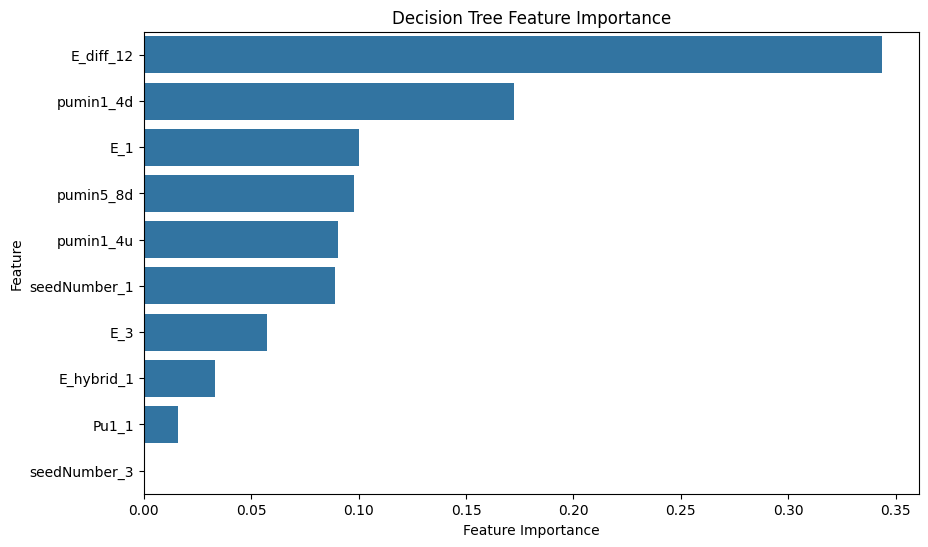

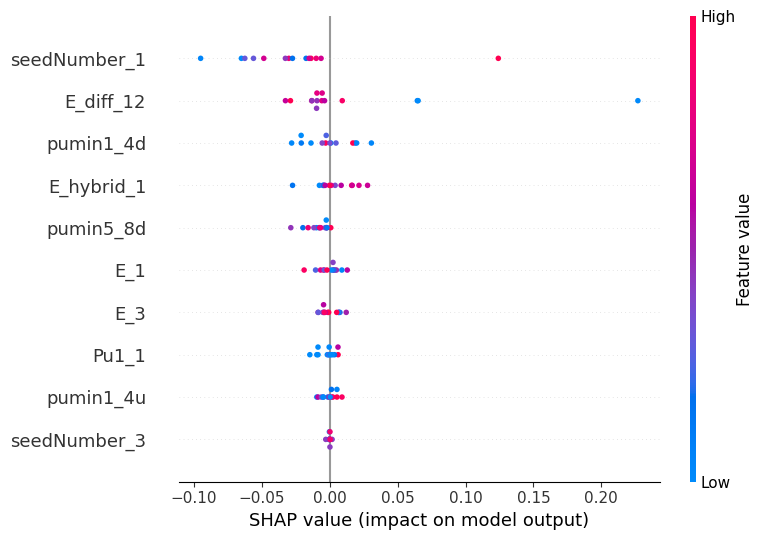

<Figure size 640x480 with 0 Axes>

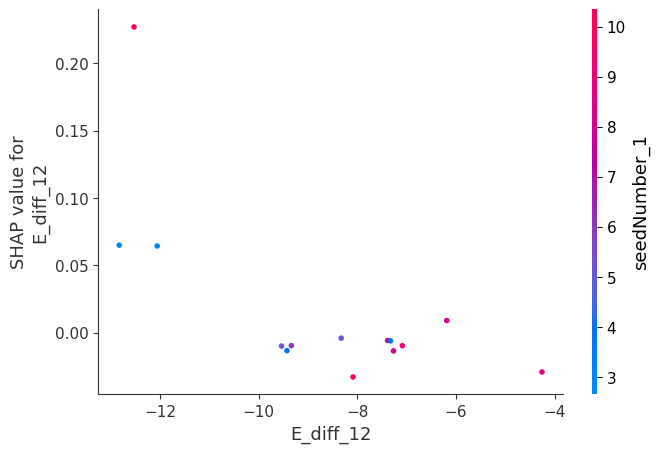

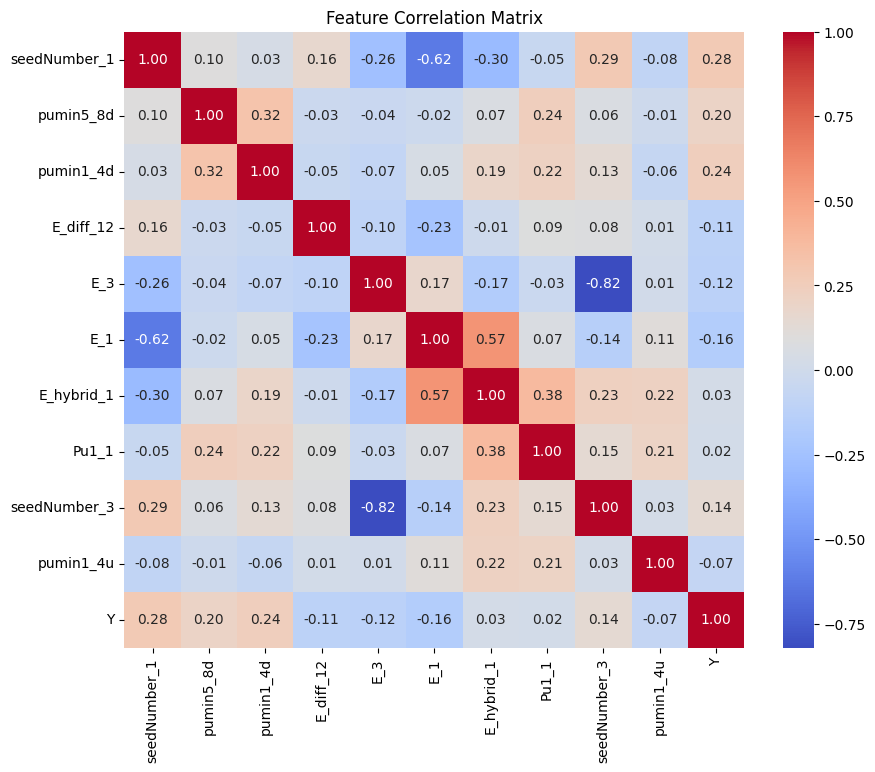

In [10]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("mergedData_annotated.num.csv")

# Define features and target
selected_features = ["seedNumber_1","pumin5_8d","pumin1_4d","E_diff_12", "E_3", "E_1", "E_hybrid_1", "Pu1_1","seedNumber_3","pumin1_4u"]
y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Train Decision Tree model
best_model = DecisionTreeRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

results = pd.DataFrame({"R2 Score": [r2], "MAE": [mae], "RMSE": [rmse]})
results.to_csv("decision_tree_results.csv", index=False)
print(results)

# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": selected_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df.to_csv("feature_importance.csv", index=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("shap_summary.png", bbox_inches='tight')
plt.show()

# SHAP Dependence Plot for Top Feature
top_feature = feature_importance_df.iloc[0, 0]
plt.figure()
shap.dependence_plot(top_feature, shap_values.values, X_test, show=False)
plt.savefig(f"shap_dependence_{top_feature}.png", bbox_inches='tight')
plt.show()

# Correlation Matrix
correlation_matrix = data[selected_features + ['Y']].corr()
correlation_matrix.to_csv("correlation_matrix.csv")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import itertools
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from itertools import combinations

# Load dataset
data = pd.read_csv("mergedData_annotated.num.csv")

# Define features and target
all_features = ["seedNumber_1","seedEbest_1","seedNumber_3","Pu1_1","Pu2_1","pumin1_4u","pumin5_8u","pumin1_4d","pumin5_8d","E_diff_12","E_3","E_1","E_hybrid_1"]
y = data['Y']  # Target variable

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Store results
results = []

# Iterate over all feature combinations from 2 to all features
for r in range(1, len(all_features) + 1):
    for feature_subset in combinations(all_features, r):
        X = data[list(feature_subset)]
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)
        
        for model_name, model in models.items():
            # Train model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
            # Store results
            results.append({
                "Feature Combination": ', '.join(feature_subset),
                "Model": model_name,
                "R2 Score": r2,
                "MAE": mae,
                "RMSE": rmse
            })

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("model_comparison_results.csv", index=False)
print("Results saved to model_comparison_results.csv")


Results saved to model_comparison_results.csv
